### Importing of modules and packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy

### Assigning current 'Weekly-covid-admissions-and-bed-publication' to the variable 'current_covid_admissions' so data be updated weekly as new data becomes available

In [2]:
current_covid_admissions ='/Users/ivan/Desktop/PycharmProjects/Data_Science_Mini/Data/raw/Weekly-covid-admissions-and-beds-publication-201217'

### Extracting last date from 'All beds COVID' sheet (although any could have been used) and assigning it to variable last_day

In [3]:
df = pd.read_excel(r'%s.xlsx' % current_covid_admissions,
                   sheet_name='All beds COVID',
                   engine='openpyxl')
last_index = df.iloc[13].last_valid_index()

# convert datetime to date in format
last_day = df.iloc[13][last_index].strftime('%m/%d/%Y')

 ## Reading in summary data from 'All beds COVID' sheet

In [4]:
list_of_regions = ['East of England','London', 'Midlands','North East and Yorkshire',
                   'North West', 'South East', 'South West']
columns_to_drop = ['Type 1 Acute?', 'NHS England Region', 'Code']

df_all_beds = pd.read_excel(r'%s.xlsx' % current_covid_admissions,
                            sheet_name='All beds COVID',
                            header=14,
                            engine='openpyxl')
df_all_beds = df_all_beds.loc[df_all_beds['Name'].isin(list_of_regions)]
df_all_beds = df_all_beds.drop(columns=columns_to_drop)
df_all_beds = df_all_beds.reset_index(drop=True)
df_all_beds

,Name,2020-08-01 00:00:00,2020-08-02 00:00:00,2020-08-03 00:00:00,2020-08-04 00:00:00,2020-08-05 00:00:00,2020-08-06 00:00:00,2020-08-07 00:00:00,2020-08-08 00:00:00,2020-08-09 00:00:00,...,2020-12-06 00:00:00,2020-12-07 00:00:00,2020-12-08 00:00:00,2020-12-09 00:00:00,2020-12-10 00:00:00,2020-12-11 00:00:00,2020-12-12 00:00:00,2020-12-13 00:00:00,2020-12-14 00:00:00,2020-12-15 00:00:00
0,East of England,85.0,80.0,73.0,69.0,70.0,72.0,60.0,59.0,59.0,...,1108.0,1149.0,1155.0,1194.0,1301.0,1327.0,1407.0,1432.0,1506.0,1502.0
1,London,126.0,120.0,122.0,118.0,111.0,113.0,105.0,126.0,107.0,...,1766.0,1822.0,1849.0,1787.0,1934.0,2031.0,2092.0,2212.0,2330.0,2482.0
2,Midlands,216.0,194.0,206.0,182.0,181.0,179.0,178.0,96.0,101.0,...,3087.0,3109.0,3128.0,3103.0,3135.0,3107.0,3076.0,3276.0,3286.0,3097.0
3,North East and Yorkshire,117.0,120.0,115.0,123.0,128.0,132.0,111.0,117.0,117.0,...,2545.0,2617.0,2566.0,2526.0,2442.0,2386.0,2309.0,2353.0,2483.0,2482.0
4,North West,191.0,188.0,181.0,181.0,183.0,160.0,160.0,154.0,136.0,...,2247.0,2388.0,2332.0,2218.0,2287.0,2278.0,2255.0,2266.0,2325.0,2322.0
5,South East,123.0,122.0,122.0,111.0,106.0,78.0,77.0,80.0,72.0,...,1549.0,1619.0,1692.0,1726.0,1796.0,1859.0,1945.0,1975.0,2118.0,2141.0
6,South West,21.0,23.0,23.0,23.0,26.0,22.0,20.0,18.0,19.0,...,887.0,912.0,907.0,913.0,901.0,913.0,843.0,946.0,1005.0,1005.0


 ### Changing column headings to dates

In [5]:
datelist = pd.date_range(start='08/01/2020', end=last_day).strftime('%d-%m-%Y')
i = 0
for col in df_all_beds.columns[1:len(datelist)+2]:
    df_all_beds.rename(columns={col:datelist[i]}, inplace=True)
    i += 1

df_all_beds

,Name,01-08-2020,02-08-2020,03-08-2020,04-08-2020,05-08-2020,06-08-2020,07-08-2020,08-08-2020,09-08-2020,...,06-12-2020,07-12-2020,08-12-2020,09-12-2020,10-12-2020,11-12-2020,12-12-2020,13-12-2020,14-12-2020,15-12-2020
0,East of England,85.0,80.0,73.0,69.0,70.0,72.0,60.0,59.0,59.0,...,1108.0,1149.0,1155.0,1194.0,1301.0,1327.0,1407.0,1432.0,1506.0,1502.0
1,London,126.0,120.0,122.0,118.0,111.0,113.0,105.0,126.0,107.0,...,1766.0,1822.0,1849.0,1787.0,1934.0,2031.0,2092.0,2212.0,2330.0,2482.0
2,Midlands,216.0,194.0,206.0,182.0,181.0,179.0,178.0,96.0,101.0,...,3087.0,3109.0,3128.0,3103.0,3135.0,3107.0,3076.0,3276.0,3286.0,3097.0
3,North East and Yorkshire,117.0,120.0,115.0,123.0,128.0,132.0,111.0,117.0,117.0,...,2545.0,2617.0,2566.0,2526.0,2442.0,2386.0,2309.0,2353.0,2483.0,2482.0
4,North West,191.0,188.0,181.0,181.0,183.0,160.0,160.0,154.0,136.0,...,2247.0,2388.0,2332.0,2218.0,2287.0,2278.0,2255.0,2266.0,2325.0,2322.0
5,South East,123.0,122.0,122.0,111.0,106.0,78.0,77.0,80.0,72.0,...,1549.0,1619.0,1692.0,1726.0,1796.0,1859.0,1945.0,1975.0,2118.0,2141.0
6,South West,21.0,23.0,23.0,23.0,26.0,22.0,20.0,18.0,19.0,...,887.0,912.0,907.0,913.0,901.0,913.0,843.0,946.0,1005.0,1005.0


 ## Reading in summary data from 'MV beds COVID' sheet

In [6]:
df_MV = pd.read_excel(r'%s.xlsx' % current_covid_admissions,
                            sheet_name='MV beds COVID',
                            header=14,
                      engine='openpyxl')
df_MV = df_MV.loc[df_MV['Name'].isin(list_of_regions)]
df_MV = df_MV.drop(columns=columns_to_drop)
df_MV = df_MV.reset_index(drop=True)
df_MV.head()

,Name,2020-08-01 00:00:00,2020-08-02 00:00:00,2020-08-03 00:00:00,2020-08-04 00:00:00,2020-08-05 00:00:00,2020-08-06 00:00:00,2020-08-07 00:00:00,2020-08-08 00:00:00,2020-08-09 00:00:00,...,2020-12-06 00:00:00,2020-12-07 00:00:00,2020-12-08 00:00:00,2020-12-09 00:00:00,2020-12-10 00:00:00,2020-12-11 00:00:00,2020-12-12 00:00:00,2020-12-13 00:00:00,2020-12-14 00:00:00,2020-12-15 00:00:00
0,East of England,9.0,9.0,8.0,8.0,8.0,9.0,9.0,11.0,9.0,...,84.0,88.0,86.0,89.0,94.0,95.0,93.0,99.0,103.0,103.0
1,London,16.0,15.0,17.0,15.0,13.0,11.0,10.0,10.0,12.0,...,242.0,244.0,249.0,241.0,256.0,261.0,256.0,256.0,262.0,292.0
2,Midlands,13.0,10.0,10.0,13.0,13.0,14.0,10.0,5.0,6.0,...,259.0,262.0,272.0,270.0,275.0,279.0,261.0,278.0,257.0,251.0
3,North East and Yorkshire,9.0,8.0,7.0,7.0,7.0,6.0,7.0,8.0,7.0,...,172.0,175.0,173.0,160.0,151.0,149.0,139.0,147.0,145.0,144.0
4,North West,15.0,15.0,13.0,13.0,13.0,13.0,13.0,14.0,14.0,...,167.0,179.0,170.0,160.0,161.0,162.0,167.0,165.0,161.0,162.0


In [7]:
i = 0
for col in df_MV.columns[1:len(datelist)+2]:
    df_MV.rename(columns={col:datelist[i]}, inplace=True)
    i += 1

df_MV

,Name,01-08-2020,02-08-2020,03-08-2020,04-08-2020,05-08-2020,06-08-2020,07-08-2020,08-08-2020,09-08-2020,...,06-12-2020,07-12-2020,08-12-2020,09-12-2020,10-12-2020,11-12-2020,12-12-2020,13-12-2020,14-12-2020,15-12-2020
0,East of England,9.0,9.0,8.0,8.0,8.0,9.0,9.0,11.0,9.0,...,84.0,88.0,86.0,89.0,94.0,95.0,93.0,99.0,103.0,103.0
1,London,16.0,15.0,17.0,15.0,13.0,11.0,10.0,10.0,12.0,...,242.0,244.0,249.0,241.0,256.0,261.0,256.0,256.0,262.0,292.0
2,Midlands,13.0,10.0,10.0,13.0,13.0,14.0,10.0,5.0,6.0,...,259.0,262.0,272.0,270.0,275.0,279.0,261.0,278.0,257.0,251.0
3,North East and Yorkshire,9.0,8.0,7.0,7.0,7.0,6.0,7.0,8.0,7.0,...,172.0,175.0,173.0,160.0,151.0,149.0,139.0,147.0,145.0,144.0
4,North West,15.0,15.0,13.0,13.0,13.0,13.0,13.0,14.0,14.0,...,167.0,179.0,170.0,160.0,161.0,162.0,167.0,165.0,161.0,162.0
5,South East,12.0,15.0,12.0,9.0,9.0,8.0,8.0,7.0,8.0,...,105.0,107.0,113.0,119.0,120.0,120.0,125.0,125.0,143.0,150.0
6,South West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,58.0,54.0,55.0,55.0,53.0,51.0,46.0,53.0,56.0,57.0


### Comparison of percentage of beds occupied by mechanical ventilation on two user defined days

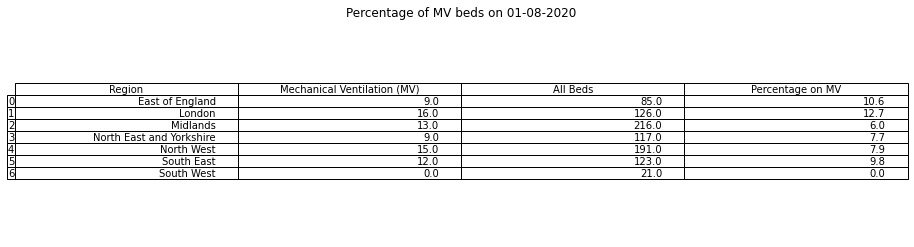

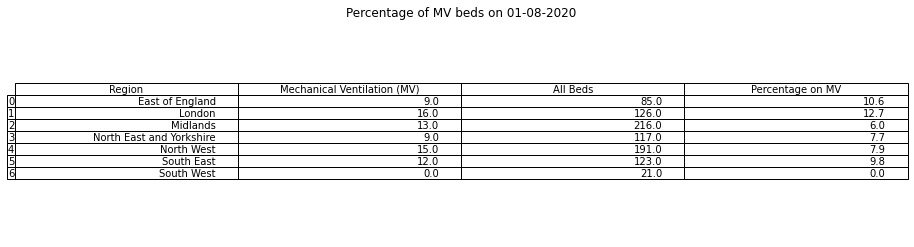

In [8]:

summary_df = pd.DataFrame(columns=['Region', 'Mechanical Ventilation (MV)',
                                   'All Beds', 'Percentage on MV'])

def mv_vs_all_beds(date):
    # assigning regions and values to summary_df
    summary_df['Region'] = df_MV['Name']
    summary_df['Mechanical Ventilation (MV)'] = df_MV[date_to_compare]
    summary_df['All Beds'] = df_all_beds[date_to_compare]
    summary_df['Percentage on MV'] =((summary_df['Mechanical Ventilation (MV)'] /summary_df['All Beds']) * 100).round(1)

    # Add title to summary_df
    fig = plt.figure(figsize = (16,4))
    ax = fig.add_subplot(111)
    ax.table(cellText = summary_df.values,
              rowLabels = summary_df.index,
              colLabels = summary_df.columns,
              loc = "center"
             )
    ax.set_title(f"Percentage of MV beds on {date_to_compare}")
    ax.axis("off")

date_to_compare = input("Please enter the first date you would like to compare (dd-mm-yyyy)")
mv_vs_all_beds(date_to_compare)

date_to_compare = input("Please enter the second date you would like to compare (dd-mm-yyyy)")
mv_vs_all_beds(date_to_compare)





### Scatter plot of all beds vs MV beds (offset MV beds from 1 to 7 days later)


1 days difference
The intercept: 42.19572357500658
The trained coefficient is: [0.08254278]

RMSE = 33.26250613293041
2 days difference
The intercept: 48.98092033275617
The trained coefficient is: [0.08311445]

RMSE = 39.82313429654999
3 days difference
The intercept: 56.54814760409482
The trained coefficient is: [0.08316125]

RMSE = 47.687037574368134
4 days difference
The intercept: 66.22174937784524
The trained coefficient is: [0.08332469]

RMSE = 58.03085291016084
5 days difference
The intercept: 73.81798928653348
The trained coefficient is: [0.08299831]

RMSE = 61.5719616164502
6 days difference
The intercept: 77.68551936490388
The trained coefficient is: [0.08364524]

RMSE = 72.33691506010535
7 days difference
The intercept: 91.42373277307934
The trained coefficient is: [0.08309619]

RMSE = 72.22783604230969
8 days difference
The intercept: 98.89850974666513
The trained coefficient is: [0.08365249]

RMSE = 82.67330383720422
9 days difference
The intercept: 106.70187810319533
The 

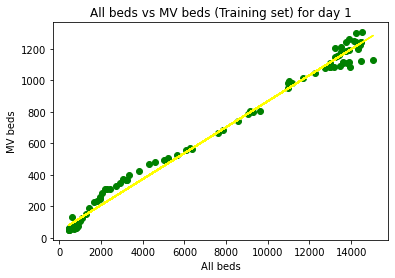

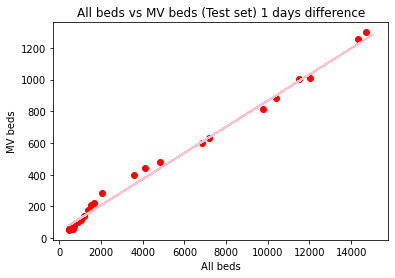

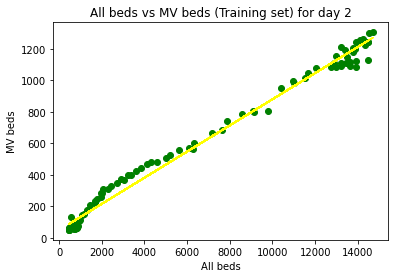

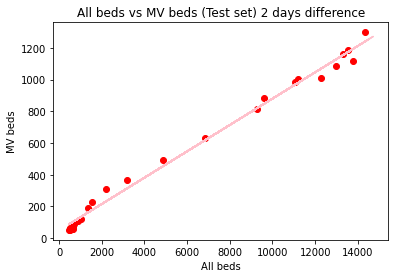

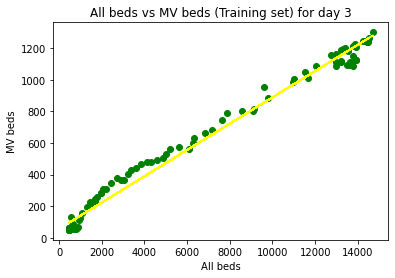

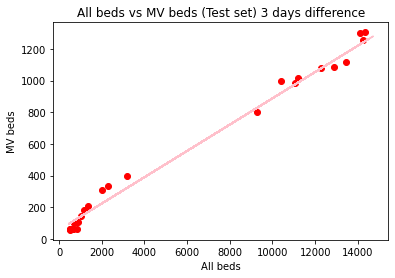

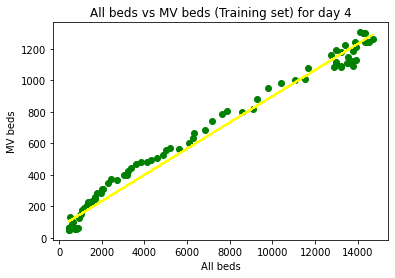

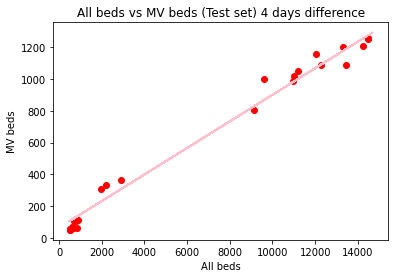

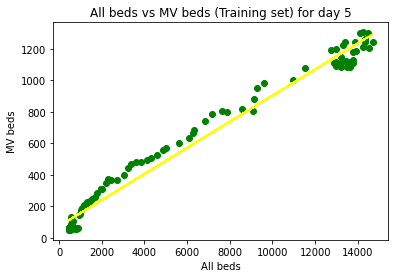

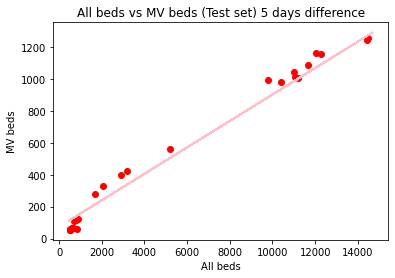

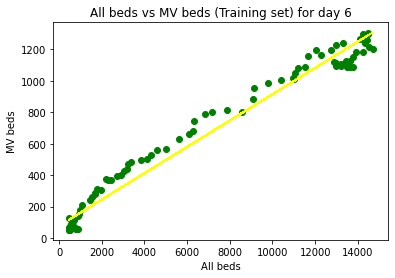

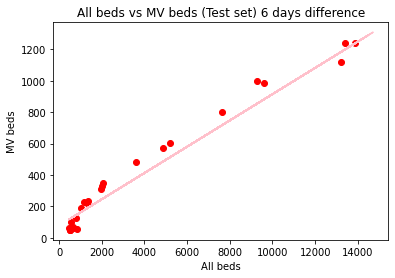

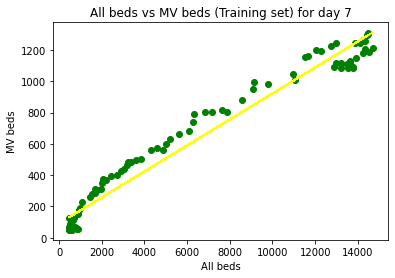

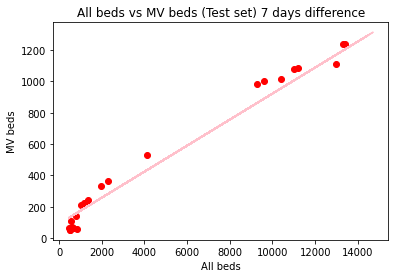

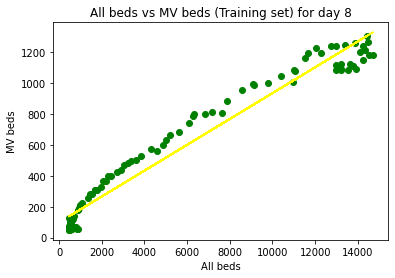

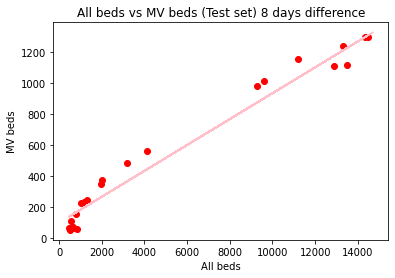

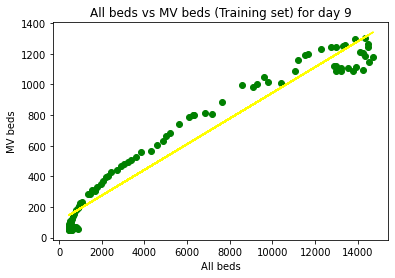

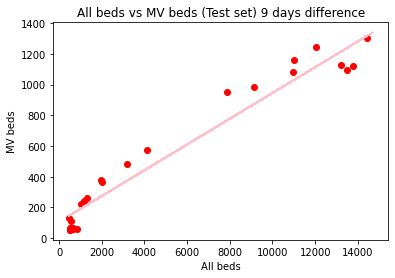

In [9]:
#extract total row from both 'All beds COVID' and 'MV beds COVID'
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# initialise variable to hold the smallest RMSE over the 6 days and assume that occurs
# at day 0
smallest_RMSE = 1000
day = 1
xlsx = pd.ExcelFile('%s.xlsx' % current_covid_admissions, engine='openpyxl')


for i in range(1,10):

    all_MV_beds = pd.read_excel(xlsx, 'MV beds COVID')
    all_beds_england = pd.read_excel(xlsx, 'All beds COVID')

    all_MV_beds = all_MV_beds.iloc[14][3+i:-1]
    all_beds_england = all_beds_england.iloc[14][4:-i]


    # need to reset the index here or NaNs will be introduced
    all_beds_vs_MV_beds = pd.concat([
        all_beds_england.reset_index(drop=True),
        all_MV_beds.reset_index(drop=True)],
        axis=1)
    all_beds_vs_MV_beds.columns = ['All Beds','MV Beds']

    # Linear Regression
    X = all_beds_vs_MV_beds.iloc[:,:-1]
    y = all_beds_vs_MV_beds.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


    # create an instance of the LinearRegression class
    ln1 = LinearRegression()

    # Train the regression model
    ln1.fit(X_train, y_train)

    # print the coefficients
    print(f"{i} days difference")
    print(f"The intercept: {ln1.intercept_}")
    print(f"The trained coefficient is: {ln1.coef_}")
    print()

    # predicting the test set
    y_pred = ln1.predict(X_test)

    # RSME (with sqaured=False)
    RMSE = metrics.mean_squared_error(y_pred, y_test, squared=False)
    print(f"RMSE = {RMSE}")
    if RMSE < smallest_RMSE:
        smallest_RMSE = RMSE
        day = i

    # Visualising the Training set results
    plt.scatter(X_train, y_train, color='green')
    plt.plot(X_train, ln1.predict(X_train), color='yellow')
    plt.title(f"All beds vs MV beds (Training set) for day {i}")
    plt.xlabel('All beds')
    plt.ylabel('MV beds')
    plt.show()

    # Visualising the Test set results
    plt.scatter(X_test, y_test, color='red')

    # don't replace anything here as regression line is based on testing set
    plt.plot(X_train, ln1.predict(X_train), color='pink')
    plt.title(f"All beds vs MV beds (Test set) {i} days difference")
    plt.xlabel('All beds')
    plt.ylabel('MV beds')
    plt.show()



In [10]:
print(f"The smallest RMSE is {smallest_RMSE.round(1)} from {day} difference")

The smallest RMSE is 33.3 from 1 difference


### Does the linear regression shows that after 1 day patients move onto a MV bed?

### Multiple Linear Regression
##### Independent variables 'All Beds' and 'Hospital Admissions and Diagnosis'
##### Dependent variable 'MV Beds'

In [11]:

# UPDATE!! 20
